# Install Dependencies

In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries

In [3]:
import os
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt




# Load and Create Dataset

In [4]:

from google.colab import files
uploaded = files.upload()

csv_file = "Formatted_ETAS_Output.csv"

# Read the CSV file using Pandas
df = pd.read_csv(csv_file, sep=',', lineterminator='\n')

# # Access the data in the DataFrame
print(df.head())




ModuleNotFoundError: No module named 'google'

In [83]:
summary_stats = df.describe(include="all")
print(summary_stats)

           Date        Time          Year            X             Y  \
count     32001       32001  32001.000000  32001.00000  32001.000000   
unique    19127       26803           NaN          NaN           NaN   
top     4/26/64  0:31:11.00           NaN          NaN           NaN   
freq         10           5           NaN          NaN           NaN   
mean        NaN         NaN   1991.924790   -117.54676     34.810868   
std         NaN         NaN     18.407271      2.11036      2.388448   
min         NaN         NaN   1960.002196   -123.48700     29.080400   
25%         NaN         NaN   1975.851679   -118.73330     33.343000   
50%         NaN         NaN   1992.311728   -117.20600     34.587100   
75%         NaN         NaN   2007.784510   -116.10520     36.820000   
max         NaN         NaN   2023.487118   -113.24630     39.475100   

           Magnitude           Z\r  
count   32001.000000  32001.000000  
unique           NaN           NaN  
top              NaN    

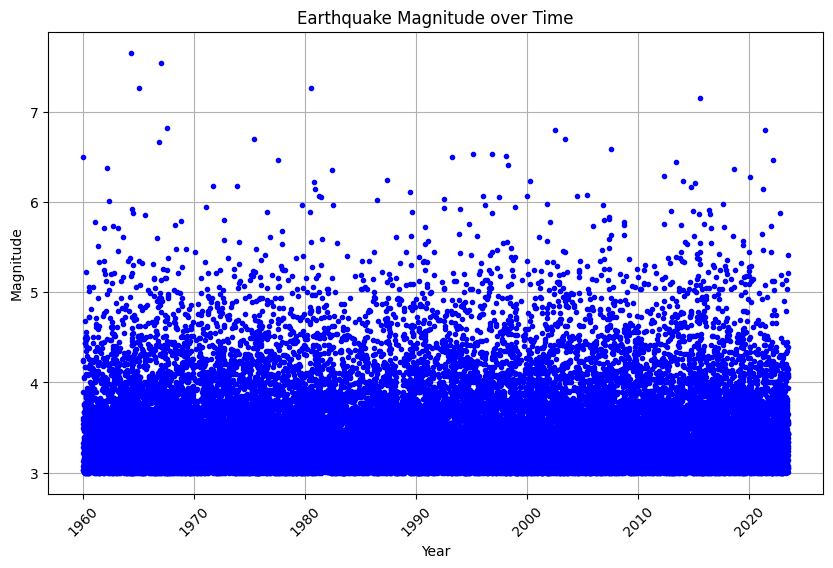

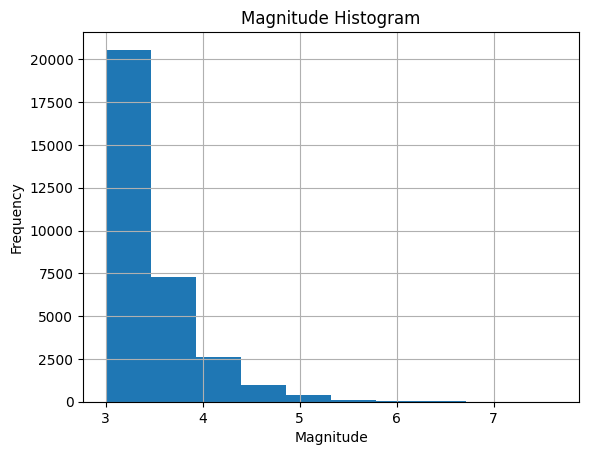

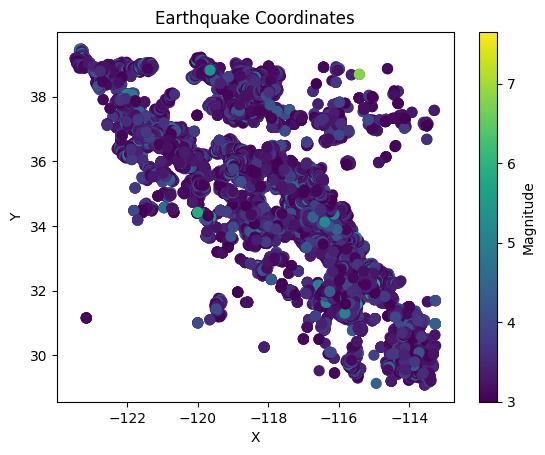

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Magnitude'], 'b.')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show(block=True)

plt.hist(df['Magnitude'], bins=10)
plt.title('Magnitude Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.scatter(df['X'], df['Y'], c=df['Magnitude'], cmap='viridis', s=50)  # Adjust the size (s) of the points as per your preference
plt.title('Earthquake Coordinates')
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()
cbar.set_label('Magnitude')
plt.show()

In [85]:
new_df = df.copy()

# Convert "Date" column to datetime in the new DataFrame
new_df["Date"] = pd.to_datetime(new_df["Date"], errors="coerce", format="%m/%d/%y")

# Adjust two-digit year values to four-digit format in the new DataFrame
new_df.loc[new_df["Date"].dt.year > pd.Timestamp.now().year, "Date"] -= pd.DateOffset(years=100)

# Extract components from the "Date" column in the new DataFrame
new_df["Day"] = new_df["Date"].dt.day
new_df["Month"] = new_df["Date"].dt.month
new_df["Year"] = new_df["Date"].dt.year
new_df["DayOfWeek"] = new_df["Date"].dt.dayofweek
new_df["Quarter"] = new_df["Date"].dt.quarter

# Convert "Time" column to datetime in the new DataFrame
new_df["Time"] = pd.to_datetime(new_df["Time"], format="%H:%M:%S.%f")

# Extract time components in the new DataFrame
new_df["Hour"] = new_df["Time"].dt.hour
new_df["Minute"] = new_df["Time"].dt.minute
new_df["Second"] = new_df["Time"].dt.second
new_df["Millisecond"] = new_df["Time"].dt.microsecond // 1000

# Drop the original "Time" column from the new DataFrame
new_df = new_df.drop("Time", axis=1)

# Drop the "Date" column from the new DataFrame
new_df = new_df.drop("Date", axis=1)

new_df.head()

,Year,X,Y,Magnitude,Z\r,Day,Month,DayOfWeek,Quarter,Hour,Minute,Second,Millisecond
0,1959,-119.0502,33.9790,6.50,8.2474,31,12,3,4,0,3,9,0
1,1960,-115.6222,33.0793,4.25,7.9322,2,1,5,1,0,8,49,0
2,1960,-115.6323,33.1220,3.03,8.4015,2,1,5,1,0,10,31,0
3,1960,-115.5851,33.0745,3.03,7.9678,2,1,5,1,0,10,32,0
4,1960,-115.6256,33.0290,3.08,7.9737,2,1,5,1,0,11,7,0


# Encoding using OrdinalEncoder

In [86]:
from sklearn.preprocessing import OrdinalEncoder

thresholds = [0, 4, 5, 6, 7, 8, float('inf')]
labels = ["Minor", "Light", "Moderate", "Strong", "Major", "Great"]

new_df["Strength"] = pd.cut(new_df["Magnitude"], bins=thresholds, labels=labels, right=False)

# Extract the "category" column as a 2D array
Strength = new_df[["Strength"]].values

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categories
Encoded_Strength = encoder.fit_transform(Strength)

# Add the encoded categories to the DataFrame
new_df["Encoded_Strength"] = Encoded_Strength

print(new_df)

       Year         X        Y  Magnitude      Z\r  Day  Month  DayOfWeek  \
0      1959 -119.0502  33.9790       6.50   8.2474   31     12          3   
1      1960 -115.6222  33.0793       4.25   7.9322    2      1          5   
2      1960 -115.6323  33.1220       3.03   8.4015    2      1          5   
3      1960 -115.5851  33.0745       3.03   7.9678    2      1          5   
4      1960 -115.6256  33.0290       3.08   7.9737    2      1          5   
...     ...       ...      ...        ...      ...  ...    ...        ...   
31996  2023 -116.5198  34.4758       3.55  18.5553   24      6          5   
31997  2023 -120.5137  35.9443       3.20  18.9807   24      6          5   
31998  2023 -114.1410  30.0220       3.43  18.6407   24      6          5   
31999  2023 -116.3940  34.1200       5.21  18.2065   26      6          0   
32000  2023 -122.7768  38.7895       3.57  17.1314   26      6          0   

       Quarter  Hour  Minute  Second  Millisecond  Strength  Encoded_Streng

In [ ]:
#Double the encode
#Use one hot encoder for the Strength

In [87]:
new_df["Magnitude"] = new_df["Magnitude"] * 100

In [88]:
new_df.head()

,Year,X,Y,Magnitude,Z\r,Day,Month,DayOfWeek,Quarter,Hour,Minute,Second,Millisecond,Strength,Encoded_Strength
0,1959,-119.0502,33.9790,650.0,8.2474,31,12,3,4,0,3,9,0,Strong,4.0
1,1960,-115.6222,33.0793,425.0,7.9322,2,1,5,1,0,8,49,0,Light,0.0
2,1960,-115.6323,33.1220,303.0,8.4015,2,1,5,1,0,10,31,0,Minor,2.0
3,1960,-115.5851,33.0745,303.0,7.9678,2,1,5,1,0,10,32,0,Minor,2.0
4,1960,-115.6256,33.0290,308.0,7.9737,2,1,5,1,0,11,7,0,Minor,2.0


In [89]:
encoded_strength_range = new_df["Encoded_Strength"].describe()[["min", "max"]]
print(encoded_strength_range)

min    0.0
max    4.0
Name: Encoded_Strength, dtype: float64


In [90]:
summary_stats = new_df.describe(include="all")
print(summary_stats)

                Year            X             Y     Magnitude           Z\r  \
count   32001.000000  32001.00000  32001.000000  32001.000000  32001.000000   
unique           NaN          NaN           NaN           NaN           NaN   
top              NaN          NaN           NaN           NaN           NaN   
freq             NaN          NaN           NaN           NaN           NaN   
mean     1991.422987   -117.54676     34.810868    345.269335      9.615045   
std        18.406353      2.11036      2.388448     46.076527      6.170866   
min      1959.000000   -123.48700     29.080400    300.000000      0.000000   
25%      1975.000000   -118.73330     33.343000    313.000000      4.236500   
50%      1992.000000   -117.20600     34.587100    331.000000      9.076000   
75%      2007.000000   -116.10520     36.820000    363.000000     15.139700   
max      2023.000000   -113.24630     39.475100    765.000000     20.000000   

                 Day         Month     DayOfWeek   

# Create Training and Testing Sets

In [91]:
from sklearn.model_selection import train_test_split

X = new_df.drop("Magnitude", axis=1)  # Features
y = new_df["Magnitude"]  # Target variable

#temporarily drop column of Strength values represented as strings (Encoded_Strength still included though)
X = X.drop("Strength", axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)

print(y_train)


       Year         X        Y      Z\r  Day  Month  DayOfWeek  Quarter  Hour  \
31932  2023 -116.3290  31.9490  18.8422   19      5          4        2     9   
31187  2021 -118.1857  38.1148   4.7292   11     11          3        4    20   
14148  1988 -117.5088  35.7325   1.6788   19      7          1        3    13   
23611  2007 -116.2980  33.9380  18.8762   26      2          0        1     3   
23500  2006 -118.1278  34.5486  14.6323   12     12          1        4    22   
...     ...       ...      ...      ...  ...    ...        ...      ...   ...   
29802  2019 -114.2620  30.3950   8.9847    1      3          4        1     3   
5390   1970 -116.5115  33.9353   9.2916   14      7          1        3    12   
860    1961 -118.3985  33.4376  19.8147   19     11          6        4    21   
15795  1991 -116.0270  37.0100  18.5641    6     11          2        4    20   
23654  2007 -121.6790  37.3120  19.3746    1      4          6        2     5   

       Minute  Second  Mill

# Create and Train Model
Note:
- This may take several minutes

- This is a temporary model that is a Multi Layered Perceptron. We plan to switch to a Convolutional Neural Network soon.

In [92]:
from sklearn.neural_network import MLPRegressor


#Notes for Hyperparameter tuning: increase max iters to much larger number. Test learning rate. Experiment with Batch size
clf = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

train_acc = clf.score(X_train, y_train)
val_acc = clf.score(X_test, y_test)

print("CNN training set accuracy = {}".format(train_acc))
print("CNN validation set accuracy = {}".format(val_acc))

CNN training set accuracy = 0.63815051226697
CNN validation set accuracy = 0.6524063836696402


# Create Convolutional Neural Network (use when converting to PyTorch)

In [ ]:
# #Build a Convoluted Neural Network

# class SurrogateCNN(nn.Module):
#     def __init__(self):
#         super(SurrogateCNN, self).__init__()

#         # Convolutional layers
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
#         self.relu1 = nn.ReLU()
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
#         self.relu2 = nn.ReLU()
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

#         # Fully connected layers
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(32 * 8 * 8, 128)
#         self.relu3 = nn.ReLU()
#         self.fc2 = nn.Linear(128, 10)  # Adjust the number of output classes as needed

#     def forward(self, x):
#         x = self.pool1(self.relu1(self.conv1(x)))
#         x = self.pool2(self.relu2(self.conv2(x)))
#         x = self.flatten(x)
#         x = self.relu3(self.fc1(x))
#         x = self.fc2(x)
#         return x




# Load Training Set (use when converting to PyTorch)


In [ ]:
# from torch.utils.data import Dataset, DataLoader
# import pandas as pd


# #Change to fit our dataset

# # Read data, convert to NumPy arrays
# data = pd.read_csv("sonar.csv", header=None)
# X = data.iloc[:, 0:60].values
# y = data.iloc[:, 60].values


# # convert into PyTorch tensors
# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# # create DataLoader, then take one batch
# loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)
# for X_batch, y_batch in loader:
#     print(X_batch, y_batch)
#     break


# Train Data (use when converting to PyTorch)

In [ ]:
# import torch.optim as optim

# # Instantiate the SurrogateCNN model
# model = SurrogateCNN()

# # Define the loss function
# criterion = nn.CrossEntropyLoss()

# # Define the optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Prepare your training data
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# # Set the number of training epochs
# num_epochs = 10

# # Training loop
# for epoch in range(num_epochs):
#     running_loss = 0.0

#     for inputs, labels in train_loader:
#         # Zero the gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(inputs)

#         # Compute the loss
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         # Update the running loss
#         running_loss += loss.item()

#     # Print the average loss for the epoch
#     epoch_loss = running_loss / len(train_loader)
#     print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

# # Save the trained model
# torch.save(model.state_dict(), "surrogate_cnn_model.pth")

NameError: ignored